<a href="https://colab.research.google.com/github/SameerR007/Students_Ability/blob/main/Students_Ability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Performing K-means cluster to get the idea about the ability of a student to get into our course.

#Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import pyplot as plt

#Uploading files

In [ ]:
from google.colab import files
data=files.upload()

Saving DUET Data - Copy.xlsx to DUET Data - Copy.xlsx


#Reading files

In [ ]:
data=pd.read_excel("DUET Data - Copy.xlsx")

In [ ]:
data.head()

,Unnamed: 0,Entrance Marks,Category,Year,Graduation Marks
0,NaN,165,Unreserved,2022,93.50
1,NaN,163,Unreserved,2022,91.15
2,NaN,163,Unreserved,2022,85.80
3,NaN,161,Unreserved,2022,88.32
4,NaN,153,Unreserved,2022,80.56


We have an extra redundant column that is to be removed

In [ ]:
data=data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.head()

,Entrance Marks,Category,Year,Graduation Marks
0,165,Unreserved,2022,93.50
1,163,Unreserved,2022,91.15
2,163,Unreserved,2022,85.80
3,161,Unreserved,2022,88.32
4,153,Unreserved,2022,80.56


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entrance Marks    261 non-null    int64  
 1   Category          261 non-null    object 
 2   Year              261 non-null    int64  
 3   Graduation Marks  249 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.3+ KB


In [ ]:
data.nunique()

Entrance Marks      102
Category              5
Year                  5
Graduation Marks    215
dtype: int64

We have four variables with Graduation marks and entrance marks being continous while year and category being categorical.

#Handling null values

In [ ]:
data.isnull().sum()

Entrance Marks       0
Category             0
Year                 0
Graduation Marks    12
dtype: int64

<AxesSubplot:>

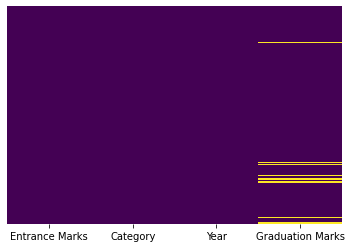

In [ ]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False,cmap='viridis')

In [ ]:
len(data)

261

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Entrance Marks      0
Category            0
Year                0
Graduation Marks    0
dtype: int64

In [ ]:
len(data)

249

#Handling wrong data

In [ ]:
data=data[data['Graduation Marks']>=50]
data.head()

,Entrance Marks,Category,Year,Graduation Marks
0,165,Unreserved,2022,93.50
1,163,Unreserved,2022,91.15
2,163,Unreserved,2022,85.80
3,161,Unreserved,2022,88.32
4,153,Unreserved,2022,80.56


#Visualizing the data

Text(0, 0.5, 'Graduation Marks')

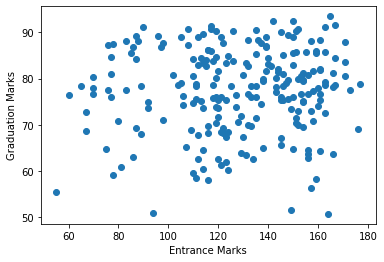

In [ ]:
plt.scatter(data['Entrance Marks'],data['Graduation Marks'])
plt.xlabel("Entrance Marks")
plt.ylabel("Graduation Marks")

#Performing K-means clustering

In [ ]:
x=data[['Graduation Marks','Entrance Marks']]
x.head()

,Graduation Marks,Entrance Marks
0,93.50,165
1,91.15,163
2,85.80,163
3,88.32,161
4,80.56,153


In [ ]:
#Standardizing the data
x_scaled=preprocessing.scale(x)    
x_scaled

array([[ 1.75661762,  1.35402015],
       [ 1.50152771,  1.28099507],
       [ 0.92079112,  1.28099507],
       [ 1.19433433,  1.20796998],
       [ 0.3519949 ,  0.91586965],
       [ 1.45919364,  0.87935711],
       [ 1.4038337 ,  0.84284457],
       [ 1.27791698,  0.80633203],
       [ 0.89365389,  0.80633203],
       [ 0.30206241,  0.55074424],
       [ 1.65458165,  0.5142317 ],
       [ 0.64073496,  0.44120661],
       [ 1.05104979,  0.40469407],
       [ 0.46705673,  0.40469407],
       [-1.3489663 ,  0.36818153],
       [ 1.12486304,  0.33166899],
       [ 1.20844569,  0.29515645],
       [ 1.43422739,  0.25864391],
       [ 0.12187124,  0.25864391],
       [-0.14298807,  0.25864391],
       [-0.13213318,  0.18561882],
       [ 0.59514443,  0.14910628],
       [ 0.66027377,  0.11259374],
       [ 0.51047629,  1.20796998],
       [ 0.58428954,  0.47771915],
       [ 0.64941888, -0.17950659],
       [-0.39373602, -0.28904422],
       [ 1.4038337 , -0.32555676],
       [ 0.95009932,

In [ ]:
wcss=[]
krange=range(1,10)
for k in krange:
  km=KMeans(n_clusters=k)
  km.fit(x_scaled)
  wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

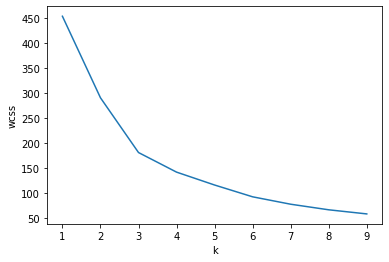

In [ ]:
plt.xlabel('k')
plt.ylabel('wcss')
plt.plot(krange,wcss)

According to elbow rule k=3 seems the most optimum value but since the fall is still dramatic after that we try to see how k changes visually.

In [ ]:
#plotting wcss with respective values of k one by one to know how clusters are being formed
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters']=kmeans_new.fit_predict(x_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters_new

,Graduation Marks,Entrance Marks,clusters
0,93.50,165,0
1,91.15,163,0
2,85.80,163,0
3,88.32,161,0
4,80.56,153,0
...,...,...,...
254,60.84,81,1
255,59.21,78,1
256,77.53,76,1
257,68.68,67,1


Text(0, 0.5, 'Graduation Marks')

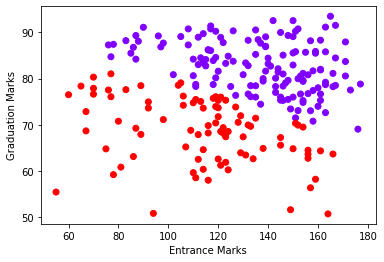

In [ ]:
plt.scatter(clusters_new['Entrance Marks'],clusters_new['Graduation Marks'],c=clusters_new['clusters'],cmap='rainbow')
plt.xlabel('Entrance Marks')
plt.ylabel('Graduation Marks')

Violet group - Hardworking 

Red group - Not so hardworking

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Graduation Marks')

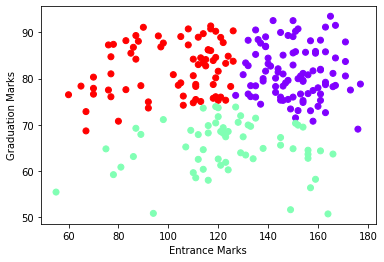

In [ ]:
kmeans_new=KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters']=kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Entrance Marks'],clusters_new['Graduation Marks'],c=clusters_new['clusters'],cmap='rainbow')
plt.xlabel('Entrance Marks')
plt.ylabel('Graduation Marks')

Red - Hardworking and high IQ

Violet- Hardworking with moderate IQ

Green- Not so hardworking

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Graduation Marks')

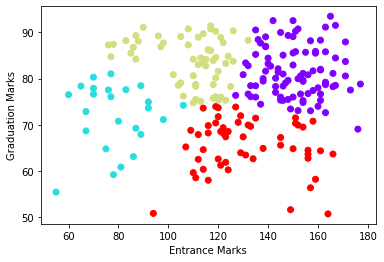

In [ ]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters']=kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Entrance Marks'],clusters_new['Graduation Marks'],c=clusters_new['clusters'],cmap='rainbow')
plt.xlabel('Entrance Marks')
plt.ylabel('Graduation Marks')

Violet- Hardworking with High IQ

Sea green- Hardworking with moderate IQ

Brown- Not so hardworking with good IQ

Red- Not so hardworking with average IQ

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Graduation Marks')

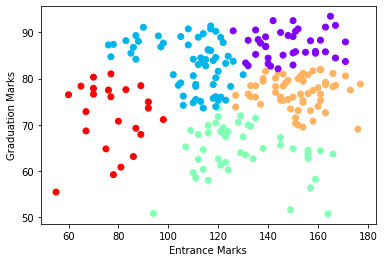

In [ ]:
kmeans_new=KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters']=kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Entrance Marks'],clusters_new['Graduation Marks'],c=clusters_new['clusters'],cmap='rainbow')
plt.xlabel('Entrance Marks')
plt.ylabel('Graduation Marks')

Orange - Hardworking with high IQ

Violet - Not so hard working with high IQ

Red - Casual with High IQ

Sea green - Not so hardworking with moderate IQ

Sky Blue - Not so hardworking with Average IQ 

After k=4 the clusters are becoming too specific. Hence we take k=4.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Entrance Marks', ylabel='Graduation Marks'>

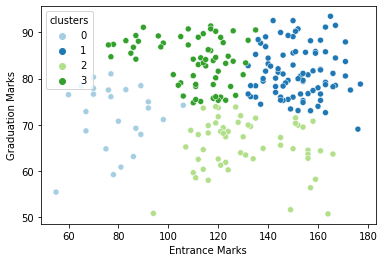

In [ ]:
kmeans_new=KMeans(4,random_state=1)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters']=kmeans_new.fit_predict(x_scaled)
sns.scatterplot(clusters_new['Entrance Marks'],clusters_new['Graduation Marks'],hue=clusters_new['clusters'],palette='Paired')

In [ ]:
clusters_new

,Graduation Marks,Entrance Marks,clusters
0,93.50,165,1
1,91.15,163,1
2,85.80,163,1
3,88.32,161,1
4,80.56,153,1
...,...,...,...
254,60.84,81,0
255,59.21,78,0
256,77.53,76,0
257,68.68,67,0


In [ ]:
clusters_new['clusters'].unique()

array([1, 2, 3, 0], dtype=int32)

In [ ]:
input_para=[]
for k in x.columns:
    s=input("Input "+k+" ")
    input_para.append(float(s))
print(input_para)
input_para[0]=(input_para[0]-data['Graduation Marks'].mean())/data['Graduation Marks'].std()
input_para[1]=(input_para[1]-data['Entrance Marks'].mean())/data['Entrance Marks'].std()
print(kmeans_new.predict([input_para]))
if (kmeans_new.predict([input_para])==0):
  print("Not Selected this time. Better luck next time.")
elif (kmeans_new.predict([input_para])==1):
  print("Congratulations! Selected for the course.")
elif(kmeans_new.predict([input_para])==2):
  print("Congratulations! Selected for the next second exam.")
else:
  print("Congratulations! Selected for the interview.")



Input Graduation Marks 76
Input Entrance Marks 135
[76.0, 135.0]
[1]
Congratulations. Selected for the course.
